In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use("ggplot")
import sklearn 
from sklearn.decomposition import TruncatedSVD

In [2]:
df=pd.read_csv('BigBasket Products.csv')

In [3]:
df.head(30)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.00,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.00,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.00,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.00,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.00,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


In [4]:
df.shape

(27555, 10)

In [5]:
df.drop(columns=['sub_category','brand','type','description','sale_price','market_price'],inplace=True)


In [6]:
df.dropna(inplace=True)

In [7]:
df.sort_values(["product"], 
                    axis=0,
                    ascending=[False], 
                    inplace=True)

In [8]:
df

,index,product,category,rating
1297,1298,oriental-Instant Noodles - Tomato Flavour,Gourmet & World Food,4.2
7434,7435,oriental Instant Noodles - Tom Yam Flavour,Gourmet & World Food,4.0
24247,24248,oriental Instant Noodles - Masala Flavour,Gourmet & World Food,3.9
19284,19285,oriental Instant Noodles - Curry Flavour,Gourmet & World Food,3.9
13906,13907,nuts almonds,Gourmet & World Food,3.5
...,...,...,...,...
6182,6183,0.0 Non Alcoholic Beer,Beverages,4.2
3072,3073,& Moms Bathing Soap - Tulsi,Beauty & Hygiene,4.4
77,78,& Moms Bathing Soap - Jasmine,Beauty & Hygiene,4.6
25791,25792,& Moms - Sandal Soap,Beauty & Hygiene,4.2


In [9]:
product=list(df['product'])
print(product)

['oriental-Instant Noodles - Tomato Flavour', 'oriental Instant Noodles - Tom Yam Flavour', 'oriental Instant Noodles - Masala Flavour', 'oriental Instant Noodles - Curry Flavour', 'nuts almonds', 'lotion - Mosquito Repellent', 'knife - Vegetable Cutting', 'chocorich classic eclairs pouch', 'aer Home Air Freshener Spray - Fresh Lush Green', 'Zoom Ultimate Dark Triangle Pencils', 'Zookers Animal Shaped Biscuits - Cherry Bits, 12+ Months, No Preservatives, No Added Colours', 'Zippy Extra Soft Toothbrush For Kids - Red, Ages 3+', 'Zipper Storage - Gallon', 'Zipper Soulful Jasmine', 'Zipper Blissful Citrus', 'Zipper Bathroom Air Freshener - Joyful Lavender', 'Zingo - Sweet Chilli Sauce', 'Zing Small Milk Mug - Z402', 'Zing Small Milk Mug - Z401', 'Zing Milk Mug - Z389', 'Zing Milk Mug - MW Z363', 'Zing Milk Mug - Ebony Smile', 'ZigZag Neem Soft Bristle Toothbrush', 'ZigZag Neem Medium Bristle Toothbrush', 'ZigZag Medium Bristle Toothbrush', 'ZigZag Charcoal Soft Bristle Toothbrush', 'ZigZa

In [10]:
df['product'].value_counts()

Turmeric Powder/Arisina Pudi                              23
Cow Ghee/Tuppa                                            12
Soft Drink                                                12
Ghee/Tuppa                                                11
Powder - Coriander                                        11
                                                          ..
Organic Unsalted Butter                                    1
Organic Unfiltered Apple Cider Vinegar with the Mother     1
Organic Turmeric Powder/Haldi/Arisina Pudi                 1
Organic Turmeric Powder/Arisina Pudi                       1
& Moms - Citrus Soap                                       1
Name: product, Length: 16287, dtype: int64

In [11]:
len(product)

18928

In [12]:
count=1
productid=[]

productid.append(1)

for i in range(1,len(product)):
    if product[i]==product[i-1]: 
        productid.append(count)
    else: 
        count=count+1
        productid.append(count)


In [13]:
productid

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 28,
 29,
 30,
 31,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 61,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 82,
 82,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 98,
 99,
 99,
 100,
 100,
 101,
 101,
 102,
 103,
 103,
 104,
 105,
 106,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 150,
 151,
 151,
 152,
 152,
 153,
 154,
 154,
 155,
 156,
 157,
 158,
 158,
 159,
 159,
 160,
 160,
 161,
 162,
 163,
 164,
 16

In [14]:
len(productid)

18928

In [15]:
max(productid)

16287

In [16]:
df['product_id']=productid

In [17]:
df

,index,product,category,rating,product_id
1297,1298,oriental-Instant Noodles - Tomato Flavour,Gourmet & World Food,4.2,1
7434,7435,oriental Instant Noodles - Tom Yam Flavour,Gourmet & World Food,4.0,2
24247,24248,oriental Instant Noodles - Masala Flavour,Gourmet & World Food,3.9,3
19284,19285,oriental Instant Noodles - Curry Flavour,Gourmet & World Food,3.9,4
13906,13907,nuts almonds,Gourmet & World Food,3.5,5
...,...,...,...,...,...
6182,6183,0.0 Non Alcoholic Beer,Beverages,4.2,16283
3072,3073,& Moms Bathing Soap - Tulsi,Beauty & Hygiene,4.4,16284
77,78,& Moms Bathing Soap - Jasmine,Beauty & Hygiene,4.6,16285
25791,25792,& Moms - Sandal Soap,Beauty & Hygiene,4.2,16286


In [18]:
pop_products = pd.DataFrame(df.groupby('product_id')['rating'].count())
most_pop = pop_products.sort_values('rating', ascending=False)
most_pop

,rating
product_id,
877,23
12654,12
2476,12
10582,11
4578,11
...,...
5690,1
5691,1
5692,1


<AxesSubplot:xlabel='product_id'>

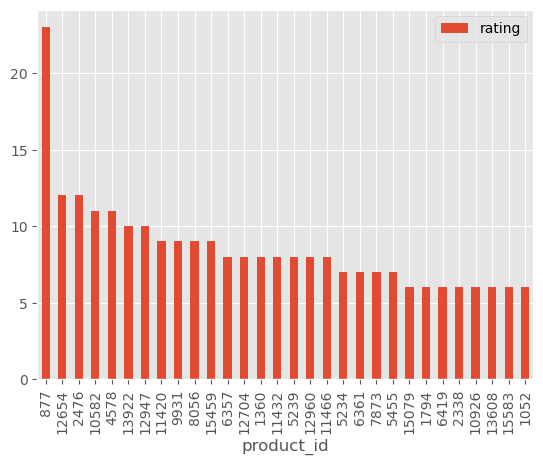

In [19]:
most_pop.head(30).plot(kind='bar')

In [20]:
subdf=df.head(1000000)

In [21]:
ratings_utility_matrix = subdf.pivot_table(values='rating',index='index',columns='product_id',fill_value=0)
ratings_utility_matrix.head()

product_id,1,2,3,4,5,6,7,8,9,10,...,16278,16279,16280,16281,16282,16283,16284,16285,16286,16287
index,,,,,,,,,,,,,,,,,,,,,
1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
ratings_utility_matrix.shape

(18928, 16287)

In [23]:
rating_utility_matrix_transpose = ratings_utility_matrix.T
rating_utility_matrix_transpose.head()

index,1,2,3,4,5,6,7,8,9,10,...,27546,27547,27548,27549,27550,27551,27552,27553,27554,27555
product_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
rating_utility_matrix_transpose.shape

(16287, 18928)

In [25]:
X=rating_utility_matrix_transpose

In [26]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(16287, 10)

In [27]:
print(decomposed_matrix)

[[-4.86387380e-08 -4.73773631e-06  3.10163616e-06 ...  9.53582740e-06
  -9.67027027e-06 -3.37214017e-06]
 [-2.70566540e-08  3.75722498e-06 -2.20832690e-06 ... -3.46030992e-06
   2.47763232e-06 -1.50702892e-05]
 [-3.19470770e-08 -4.98655344e-07  1.09165653e-06 ...  3.04389030e-06
  -3.82424257e-06  4.84721939e-06]
 ...
 [-1.60677188e-07 -9.58723062e-06  9.86756615e-07 ...  1.06405140e-05
  -2.49816848e-06  5.99760021e-05]
 [ 1.20663085e-07  7.30941346e-07  9.29806813e-07 ... -1.03661907e-06
   6.13895165e-06  1.16675693e-05]
 [-4.19954668e-08  1.58386015e-08 -1.54034944e-06 ...  4.51157247e-06
  -2.22222322e-06 -2.04413941e-05]]


In [28]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(16287, 16287)

In [29]:
size=correlation_matrix.shape[0]

In [30]:
print(correlation_matrix)

[[ 1.         -0.24838459  0.49241695 ... -0.39321134 -0.52556726
   0.42401468]
 [-0.24838459  1.         -0.71953456 ... -0.62996335 -0.40877993
   0.55763189]
 [ 0.49241695 -0.71953456  1.         ...  0.25863669 -0.29030866
   0.0852288 ]
 ...
 [-0.39321134 -0.62996335  0.25863669 ...  1.          0.67930755
  -0.76234034]
 [-0.52556726 -0.40877993 -0.29030866 ...  0.67930755  1.
  -0.95154273]
 [ 0.42401468  0.55763189  0.0852288  ... -0.76234034 -0.95154273
   1.        ]]


In [31]:
import random

In [49]:
def model(df,product_id): 
    subdf=df.head(1000000)
    ratings_utility_matrix = subdf.pivot_table(values='rating',index='index',columns='product_id',fill_value=0)
    rating_utility_matrix_transpose = ratings_utility_matrix.T
    X=rating_utility_matrix_transpose
    SVD = TruncatedSVD(n_components=30)
    decomposed_matrix = SVD.fit_transform(X)
    correlation_matrix = np.corrcoef(decomposed_matrix)
    correlation_product_id = correlation_matrix[product_id]
    recommend = list(X.index[correlation_product_id > 0.80])
    rlist=[]
    for item in recommend: 
        rlist.append(df.loc[df['product_id']==item,'product'])
    return rlist

In [50]:
model(df,random.randint(0,size))

[18745    Toothbrush - Kids (Soft)
 Name: product, dtype: object,
 24403    Stainless Steel Glitter Master Soup Spoon
 Name: product, dtype: object,
 27368    Stacko Coffee Mugs - Hilton 304
 Name: product, dtype: object,
 25854    Savlon Antiseptic - Disinfectant Liquid 200 ml
 Name: product, dtype: object,
 4057    Planter Tray
 Name: product, dtype: object,
 10865    Peacock - Kasoori Methi
 21235    Peacock - Kasoori Methi
 Name: product, dtype: object,
 21546    Natives Chana Dal
 Name: product, dtype: object,
 374    Milly Magic Chocolate Balls - Gluten Free
 Name: product, dtype: object,
 9466    Jamun Vati
 Name: product, dtype: object,
 4792    Cotton Enriched Toilet Paper - Deluxe, 3 Ply
 Name: product, dtype: object,
 12944    Clear Complexion Brightening Face Wash
 7659     Clear Complexion Brightening Face Wash
 Name: product, dtype: object,
 18336    Butter Milk - Ginger & Jeera (Spiced)
 Name: product, dtype: object,
 8255    Badam Keshari Milk Masala
 4261    Badam Kesh